In [13]:
import os
import csv

csv_dir = "../log/droid/vectors-dinov2/64-32-Uni_8_16-10-10K"

data_dict = {}

for csv_name in os.listdir(csv_dir):
    if not csv_name.endswith(".csv"):
        continue

    index_name = csv_name.split(".csv")[0]

    filepath = os.path.join(csv_dir, csv_name)
    with open(filepath, newline="", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        records = []
        for row in reader:
            records.append(tuple(map(int, row.values())))

    data_dict[index_name] = records

data_dict

{'dtw_search': [(10, 61073, 781, 10000, 1000, 37442073, 136976116),
  (20, 176549, 1531, 10000, 1000, 180962272, 418730792),
  (50, 212170, 3009, 10000, 1000, 244903734, 500187273),
  (100, 379088, 4674, 10000, 1000, 500232683, 892958930),
  (200, 699325, 6385, 10000, 1000, 1014100558, 1648682351),
  (500, 1568985, 8099, 10000, 1000, 2572445014, 3776638321),
  (1000, 2937648, 8919, 10000, 1000, 5180692195, 7144513429),
  (2000, 5546943, 9420, 10000, 1000, 10426192119, 13603565709)],
 'dtw_layer_search': [(10, 80977, 781, 10000, 1000),
  (20, 297621, 1531, 10000, 1000),
  (50, 343648, 3009, 10000, 1000),
  (100, 636390, 4674, 10000, 1000),
  (200, 1200433, 6385, 10000, 1000),
  (500, 2870385, 8099, 10000, 1000),
  (1000, 5602394, 8919, 10000, 1000),
  (2000, 10696901, 9420, 10000, 1000)],
 'ivfpq_search': [(10, 1422299, 5375, 10000, 1000),
  (20, 1475832, 6662, 10000, 1000),
  (50, 1649347, 8155, 10000, 1000),
  (100, 2003261, 9053, 10000, 1000),
  (200, 2473912, 9643, 10000, 1000),
  (

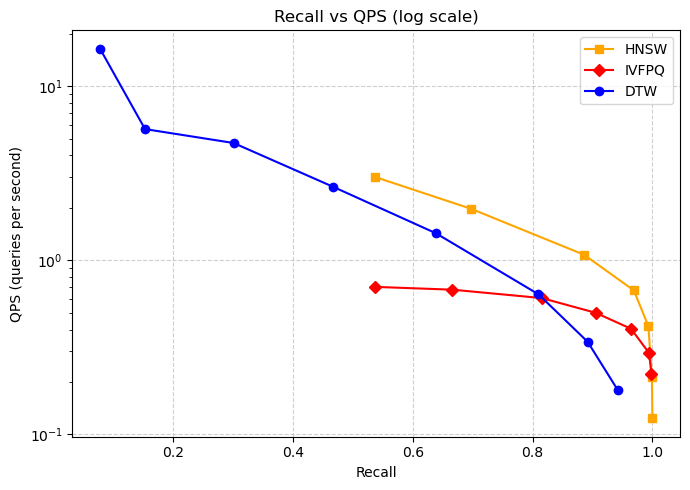

In [14]:
import matplotlib.pyplot as plt


plot_styles = {
    # "brute_force": {"color": "green", "marker": "^", "label": "Brute Force"},
    "hnsw": {"color": "orange", "marker": "s", "label": "HNSW"},
    "ivfpq": {"color": "red", "marker": "D", "label": "IVFPQ"},
    "dtw": {"color": "blue", "marker": "o", "label": "DTW"},
    # "dtw_layer": {"color": "cyan", "marker": "<", "label": "DTW Layer"},
    # "my_hnsw": {"color": "magenta", "marker": ">", "label": "My HNSW"},
}


def extract_xy(records):
    recall = [r[2] / r[3] for r in records]
    qps = [r[4] / (r[1] / 1000) for r in records]
    return recall, qps


plt.figure(figsize=(7, 5))

for algm, style in plot_styles.items():
    records = data_dict[algm + "_search"]
    recall, qps = extract_xy(records)
    plt.plot(recall, qps, marker=style["marker"], color=style["color"], label=style["label"], linewidth=1.5)

plt.xlabel("Recall")
plt.ylabel("QPS (queries per second)")
plt.yscale("log")
plt.title("Recall vs QPS (log scale)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

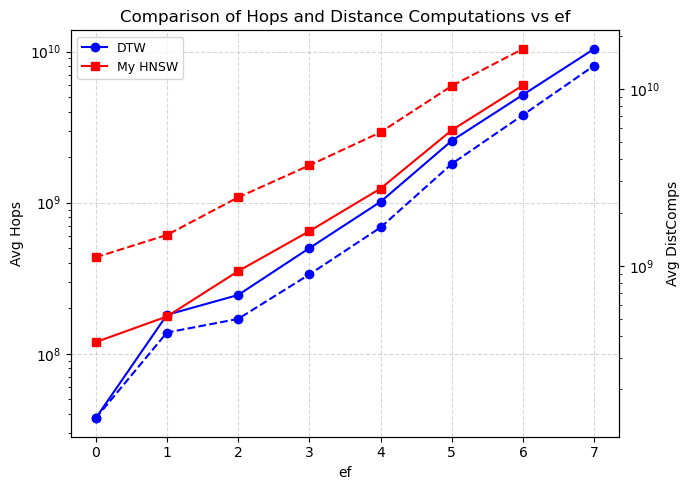

In [15]:
import matplotlib.pyplot as plt

plot_styles = {
    "dtw": {"color": "blue", "marker": "o", "label": "DTW"},
    "my_hnsw": {"color": "red", "marker": "s", "label": "My HNSW"},
}


def extract_metrics(records):
    ef_values = [r[0] for r in records]
    hops = [r[5] for r in records]
    dists = [r[6] for r in records]
    return ef_values, hops, dists


fig, ax1 = plt.subplots(figsize=(7, 5))
ax2 = ax1.twinx()

for algm, style in plot_styles.items():
    records = data_dict[algm + "_search"]
    ef, hops, dists = extract_metrics(records)

    x = range(len(ef))
    ax1.plot(x, hops, marker=style["marker"], color=style["color"], linestyle="-", label=f"{style['label']}")
    ax2.plot(x, dists, marker=style["marker"], color=style["color"], linestyle="--", label=f"{style['label']}")

ax1.set_xlabel("ef")
ax1.set_ylabel("Avg Hops")
ax1.set_yscale("log")
ax2.set_ylabel("Avg DistComps")
ax2.set_yscale("log")

ax1.legend(loc="upper left", fontsize=9)

ax1.grid(True, linestyle="--", alpha=0.5)
plt.title("Comparison of Hops and Distance Computations vs ef")
plt.tight_layout()
plt.show()